In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

#plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import folium
import datetime
import calendar

In [17]:
df= pd.read_csv("Motor_Vehicle_Collisions_-_Crashes.csv")
df.head(10)

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning:

Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.



DATE   TIME   BOROUGH ZIP_CODE  LATITUDE  LONGITUDE LOCATION  \
0  4/14/2020  11:00       NaN      NaN       NaN        NaN      NaN   
1  6/13/2016  17:10       NaN      NaN       NaN        NaN      NaN   
2  6/13/2016  17:30       NaN      NaN       NaN        NaN      NaN   
3   8/2/2018   9:30       NaN      NaN       NaN        NaN      NaN   
4  6/13/2016  18:00       NaN      NaN       NaN        NaN      NaN   
5   2/3/2014  17:00       NaN      NaN       NaN        NaN      NaN   
6  6/13/2016  19:20       NaN      NaN       NaN        NaN      NaN   
7   2/3/2014  17:30       NaN      NaN       NaN        NaN      NaN   
8  4/13/2020  17:00       NaN      NaN       NaN        NaN      NaN   
9  4/13/2020   8:55  BROOKLYN    11215       NaN        NaN      NaN   

                     ON_STREET_NAME                 CROSS_STREET_NAME  \
0  VERRAZANO BRIDGE UPPER                                         NaN   
1  STATEN ISLAND EXPY                                             NaN   
2  MAJOR DEEGAN EXPRESSWAY                                        NaN   
3                               NaN                               NaN   
4  WEST SHORE EXPRESSWAY                                          NaN   
5                               NaN                               NaN   
6  VANWYCK EXPRESSWAY                                  LIBERTY AVENUE   
7  44 STREET                         55 AVENUE                          
8  CROSS BRONX EXPY RAMP                                          NaN   
9                               NaN                               NaN   

                            OFF_STREET_NAME  ...  \
0                                       NaN  ...   
1                                       NaN  ...   
2                                       NaN  ...   
3  262       BRIGHTON 6 STREET               ...   
4                                       NaN  ...   
5  2928 WEST STREET                          ...   
6                                       NaN  ...   
7                                       NaN  ...   
8                                       NaN  ...   
9  105       PROSPECT PARK WEST              ...   

   CONTRIBUTING_FACTOR_VEHICLE_2  CONTRIBUTING_FACTOR_VEHICLE_3  \
0                    Unspecified                            NaN   
1                    Unspecified                            NaN   
2                    Unspecified                            NaN   
3                            NaN                            NaN   
4                    Unspecified                    Unspecified   
5                    Unspecified                            NaN   
6                    Unspecified                            NaN   
7                    Unspecified                            NaN   
8                            NaN                            NaN   
9                            NaN                            NaN   

   CONTRIBUTING_FACTOR_VEHICLE_4  CONTRIBUTING_FACTOR_VEHICLE_5  COLLISION_ID  \
0                            NaN                            NaN     4309146.0   
1                            NaN                            NaN     3461754.0   
2                            NaN                            NaN     3461325.0   
3                            NaN                            NaN     3953244.0   
4                            NaN                            NaN     3461757.0   
5                            NaN                            NaN      116109.0   
6                            NaN                            NaN     3470892.0   
7                            NaN                            NaN      245117.0   
8                            NaN                            NaN     4308758.0   
9                            NaN                            NaN     4308804.0   

                        VEHICLE_TYPE_1     VEHICLE_TYPE_2     VEHICLE_TYPE_3  \
0                                Sedan                 C1                NaN   
1                    PASSENGER VEHICLE  PASSENGE

In [3]:
print('DATASET SHAPE: ', df.shape)


DATASET SHAPE:  (667216, 29)


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667216 entries, 0 to 667215
Data columns (total 29 columns):
DATE                             667216 non-null object
TIME                             667215 non-null object
BOROUGH                          439057 non-null object
ZIP_CODE                         438936 non-null object
LATITUDE                         595297 non-null float64
LONGITUDE                        595297 non-null float64
LOCATION                         595297 non-null object
ON_STREET_NAME                   508738 non-null object
CROSS_STREET_NAME                353248 non-null object
OFF_STREET_NAME                  150286 non-null object
INJURED_PERSONS                  667209 non-null float64
KILLED_PERSONS                   667199 non-null float64
INJURED_PEDESTRIANS              667215 non-null float64
KILLED_PEDESTRIANS               667215 non-null float64
INJURED_CYCLISTS                 667215 non-null float64
KILLED_CYCLISTS                  667215 no

In [5]:
pd.DataFrame(df.isnull().sum() / df.shape[0] *100, columns=['Missing Value %'])


Missing Value %
DATE                                  0.000000
TIME                                  0.000150
BOROUGH                              34.195673
ZIP_CODE                             34.213808
LATITUDE                             10.778968
LONGITUDE                            10.778968
LOCATION                             10.778968
ON_STREET_NAME                       23.752128
CROSS_STREET_NAME                    47.056426
OFF_STREET_NAME                      77.475660
INJURED_PERSONS                       0.001049
KILLED_PERSONS                        0.002548
INJURED_PEDESTRIANS                   0.000150
KILLED_PEDESTRIANS                    0.000150
INJURED_CYCLISTS                      0.000150
KILLED_CYCLISTS                       0.000150
INJURED_MOTORISTS                     0.000150
KILLED_MOTORISTS                      0.000150
CONTRIBUTING_FACTOR_VEHICLE_1         0.312493
CONTRIBUTING_FACTOR_VEHICLE_2        15.145470
CONTRIBUTING_FACTOR_VEHICLE_3        93.458340
CONTRIBUTING_FACTOR_VEHICLE_4        98.601952
CONTRIBUTING_FACTOR_VEHICLE_5        99.633252
COLLISION_ID                          0.000150
VEHICLE_TYPE_1                        0.523069
VEHICLE_TYPE_2                       19.582564
VEHICLE_TYPE_3                       91.810898
VEHICLE_TYPE_4                       97.058973
VEHICLE_TYPE_5                       99.361226

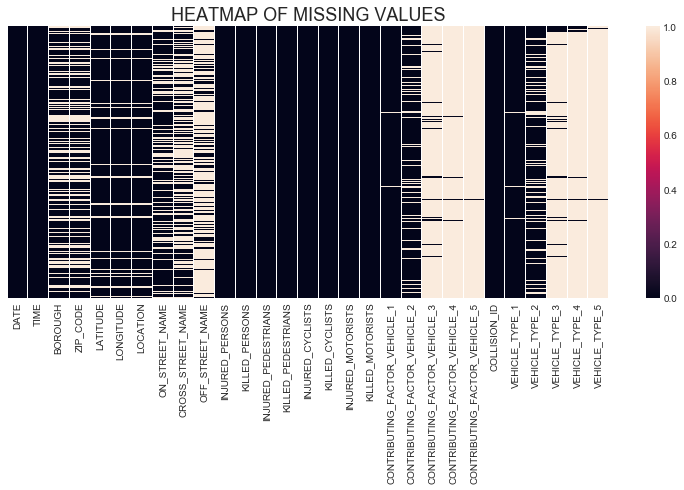

In [16]:
plt.figure(figsize=(12,5))
plt.title('HEATMAP OF MISSING VALUES', fontsize=18)
sns.heatmap(df.isnull(), yticklabels=False)

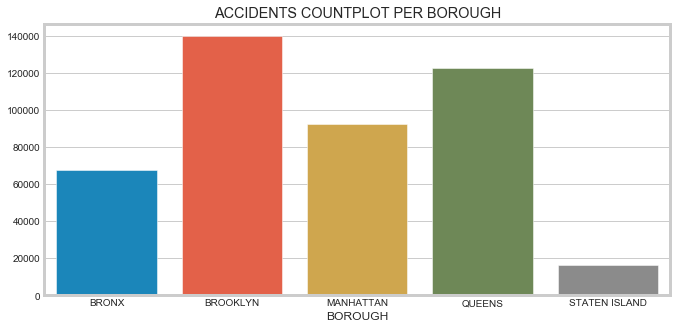

In [18]:
plt.figure(figsize=(10,5))
plt.title('ACCIDENTS COUNTPLOT PER BOROUGH')
sns.barplot(x=df.groupby('BOROUGH').size().index,
            y=df.groupby('BOROUGH').size().values)

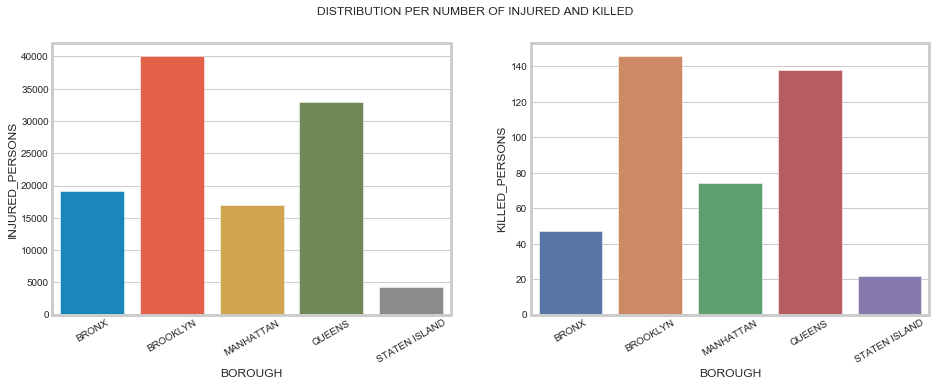

In [28]:
accidents_bor_df = df.groupby('BOROUGH')[['INJURED_PERSONS', 'KILLED_PERSONS']].sum()


fig, ax = plt.subplots(1,2,figsize=(14,5))
plt.suptitle('DISTRIBUTION PER NUMBER OF INJURED AND KILLED')

ax[1].set_xticklabels(labels=accidents_bor_df.index,rotation=30)
ax[0].set_xticklabels(labels=accidents_bor_df.index,rotation=30)


sns.barplot(accidents_bor_df.index, accidents_bor_df['INJURED_PERSONS'], ax=ax[0])
sns.barplot(accidents_bor_df.index, accidents_bor_df['KILLED_PERSONS'], ax=ax[1], palette='deep')

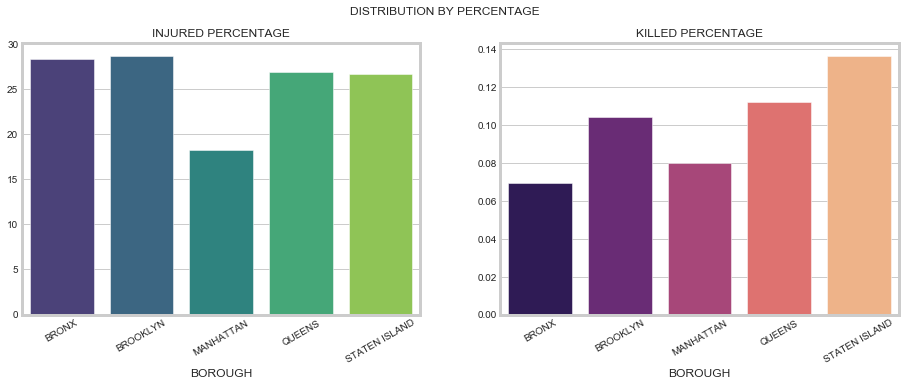

In [29]:
fig, ax = plt.subplots(1,2, figsize=(14,5))
plt.suptitle('DISTRIBUTION BY PERCENTAGE')

ax[1].set_xticklabels(labels=accidents_bor_df.index,rotation=30)
ax[0].set_xticklabels(labels=accidents_bor_df.index,rotation=30)
ax[0].set_title('INJURED PERCENTAGE', fontsize=12)
ax[1].set_title('KILLED PERCENTAGE', fontsize=12)


sns.barplot((accidents_bor_df['INJURED_PERSONS'] / df.groupby('BOROUGH').size() *100).index, 
           (accidents_bor_df['INJURED_PERSONS'] / df.groupby('BOROUGH').size() *100).values, ax=ax[0], palette='viridis')

sns.barplot((accidents_bor_df['KILLED_PERSONS'] / df.groupby('BOROUGH').size() *100).index, 
           (accidents_bor_df['KILLED_PERSONS'] / df.groupby('BOROUGH').size() *100).values, ax=ax[1], palette='magma')

In [30]:
print('MEAN INJURED: ',(accidents_bor_df['INJURED_PERSONS'] / df.groupby('BOROUGH').size() *100).values.mean())
print('MEAN KILLED: ',(accidents_bor_df['KILLED_PERSONS'] / df.groupby('BOROUGH').size() *100).values.mean())

MEAN INJURED:  25.76756477494185
MEAN KILLED:  0.10053412587941105


In [24]:
datewise = df.groupby(['DATE', 'BOROUGH'])[[i for i in df.columns if 'number' in i]].sum()

In [26]:
df.groupby('DATE').size().mean()


468.2217543859649

In [32]:
fig = make_subplots(rows=3,cols=1,
                    subplot_titles=('PEDESTRIAN', 'CYCLIST', 'MOTORIST'))

feat_in  = ['INJURED_PEDESTRIANS',
         'INJURED_CYCLISTS',
         'INJURED_MOTORISTS']

feat_killed = ['KILLED_PEDESTRIANS', 
              'KILLED_CYCLISTS', 
         'KILLED_MOTORISTS']

for i, atype in enumerate(feat_in):
    data_per_acc = df.groupby('DATE')[atype].sum()
    data_per_acc1 = df.groupby('DATE')[feat_killed[i]].sum()
    
    fig.add_trace(go.Scatter(x=data_per_acc.index, y=data_per_acc.values, name='Injured'), row=i+1,col=1)
    fig.add_trace(go.Scatter(x=data_per_acc1.index, y=data_per_acc1.values, name='Killed'), row=i+1, col=1)

fig.update_layout(title='NUMBER OF KILLED AND INJURED PER ACCIDENT TYPE',template='plotly_dark', width=1000, height=1100)
fig.show()

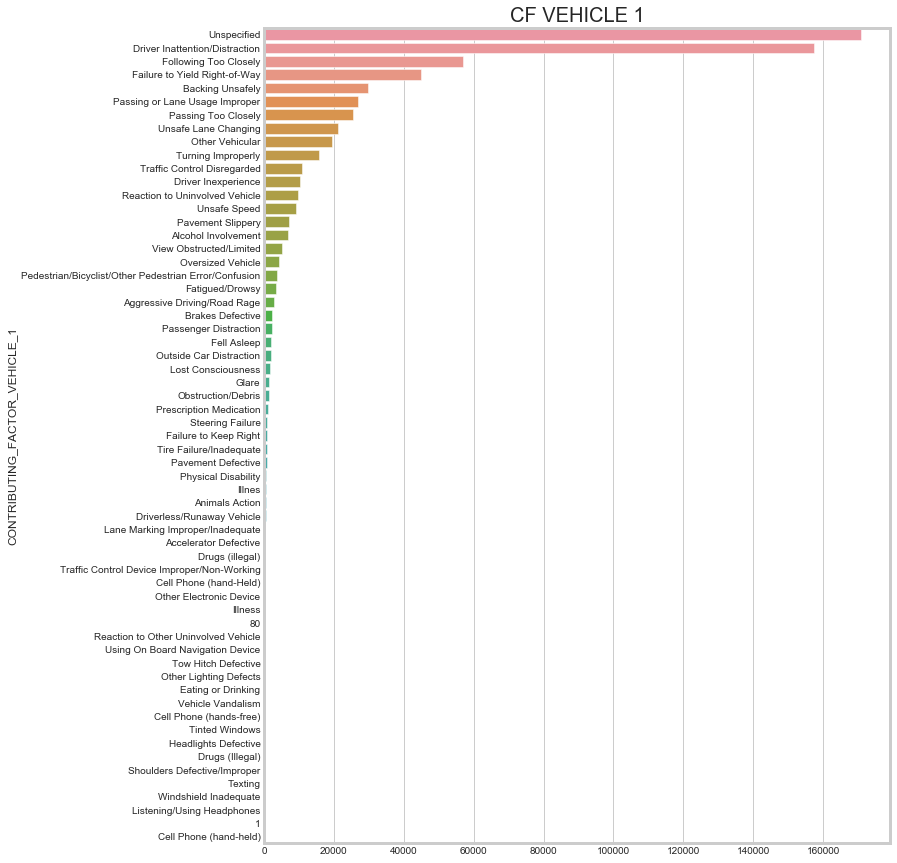

In [33]:
contri_df = df.groupby('CONTRIBUTING_FACTOR_VEHICLE_1').size().sort_values(ascending=False)

plt.figure(figsize=(10,15))
plt.title('CF VEHICLE 1', fontsize=20)

sns.barplot(y = contri_df.index, x = contri_df.values)

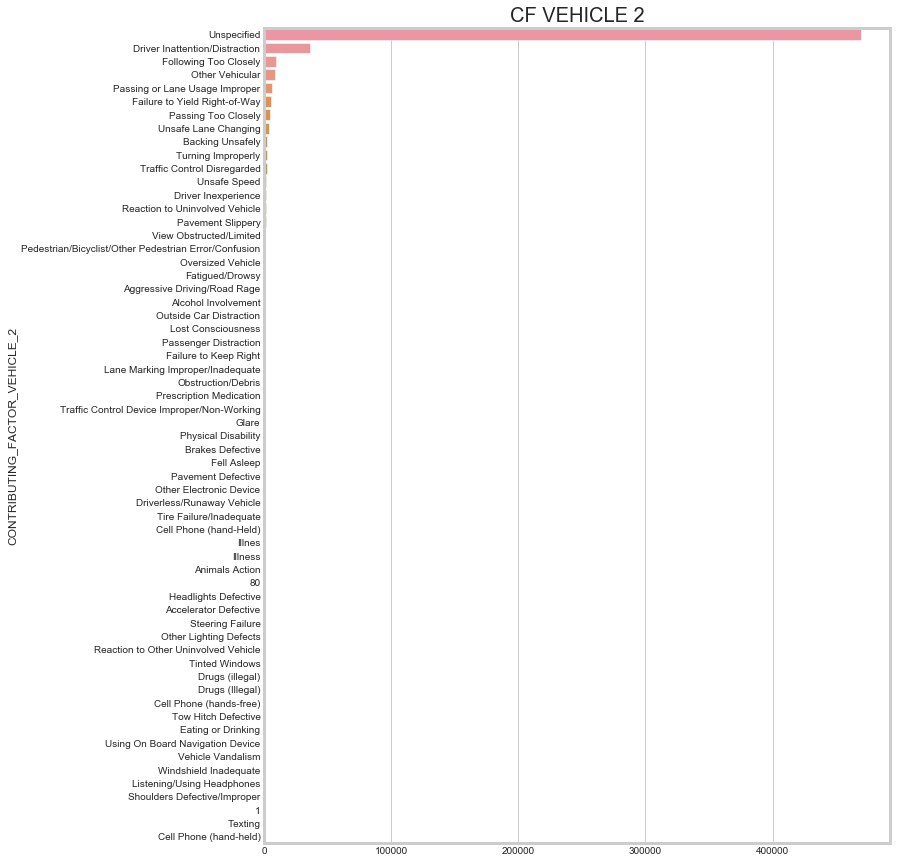

In [34]:
contri_df = df.groupby('CONTRIBUTING_FACTOR_VEHICLE_2').size().sort_values(ascending=False)

plt.figure(figsize=(10,15))
plt.title('CF VEHICLE 2', fontsize=20)

sns.barplot(y = contri_df.index, x = contri_df.values)

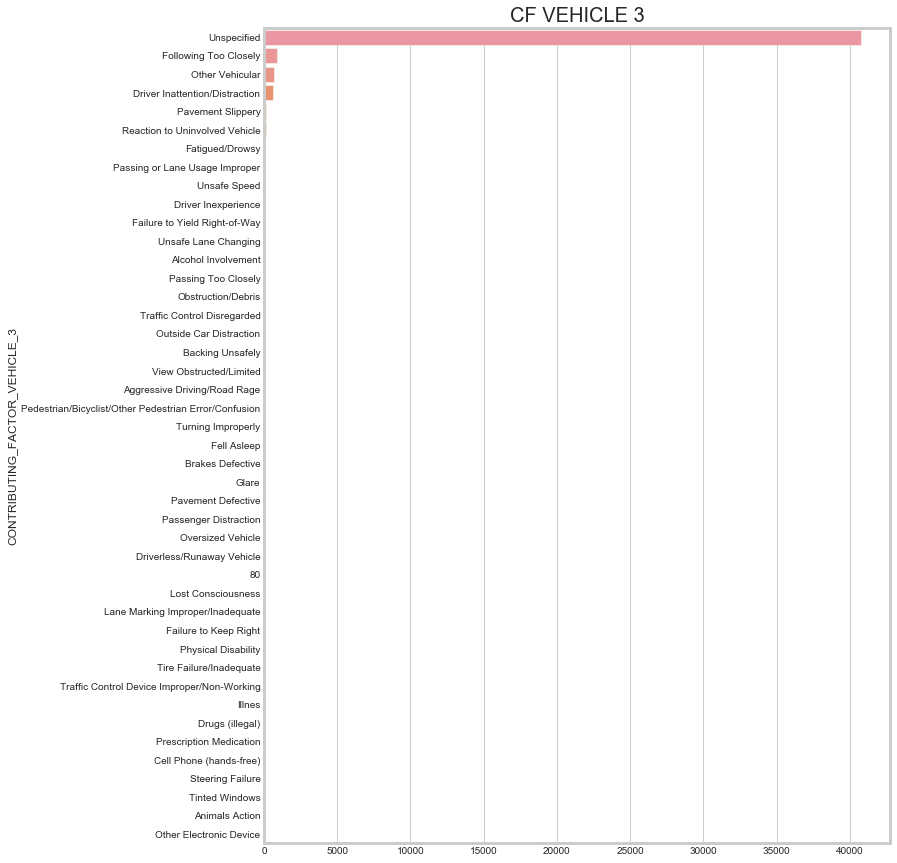

In [36]:
contri_df = df.groupby('CONTRIBUTING_FACTOR_VEHICLE_3').size().sort_values(ascending=False)

plt.figure(figsize=(10,15))
plt.title('CF VEHICLE 3', fontsize=20)

sns.barplot(y = contri_df.index, x = contri_df.values)

In [ ]:
# load dogs vs cats dataset, reshape and save to a new file
from os import listdir
from matplotlib import  pyplot
from numpy import asarray
from numpy import save
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
# define location of dataset
folder = '/content/drive/My Drive/images/train/'
photos = list()
# enumerate files in the directory
for file in listdir(folder):
	# determine class
	output = 0.0
	if file.startswith('train'):
		output = 1.0
	# load image
	photo = load_img(folder + file, target_size=(224, 224,1))
	# convert to numpy array
	photo = img_to_array(photo)
	# store
	photos.append(photo)
  
  

# convert to a numpy arrays
print(np.shape(photos))
print(np.reshape(photos,(-1)))
#convert the array into 1D array

